In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [16]:
# Load data from CSV file
data = pd.read_csv('legal_documents.csv')

# Display the first few rows of the DataFrame
print(data.head())


                                                text
0  1987 constitution of the philippines  \npreamb...
1  republic of the philippines \ncongress of the ...
2  1899  \nconstitution of the  \nrepublic of the...
3  1935 constitution  of the philippines  \n \npr...
4  1973 constit ution of the philippines  \npream...


In [17]:
# Display the columns of the DataFrame
print(data.columns)# Preprocess text data (tokenization, lowercase, remove punctuation, etc.)
# You can use libraries like NLTK or SpaCy for more advanced preprocessing
# Here's a simple example using lowercasing and removing punctuation
data['processed_text'] = data['text'].str.lower().replace('[^\w\s]','')
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_text'])

# Convert the TF-IDF matrix to a dense array
tfidf_matrix_dense = tfidf_matrix.toarray()



Index(['text'], dtype='object')


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\john\AppData\Local\Temp\ipykernel_31716\3495104910.py:5: SyntaxWarning: invalid escape sequence '\w'
  data['processed_text'] = data['text'].str.lower().replace('[^\w\s]','')


In [18]:
# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix_dense.shape)

# Print the number of documents
num_documents = tfidf_matrix_dense.shape[0]
print("Number of Documents:", num_documents)

# Fit the K-means model only if the number of documents is greater than or equal to the number of clusters
if num_documents >= k:
    kmeans.fit(tfidf_matrix_dense)
    cluster_labels = kmeans.labels_
else:
    print("Error: Number of documents is less than the number of clusters.")


TF-IDF Matrix Shape: (5, 1000)
Number of Documents: 5


In [20]:
# Adjust the number of clusters based on the number of documents
k = min(k, num_documents)

# Fit the K-means model
kmeans.fit(tfidf_matrix_dense)
cluster_labels = kmeans.labels_


In [22]:
# Adjust the number of clusters if it's equal to or greater than the number of samples
k = min(k, num_documents - 1)

# Evaluate clustering performance using silhouette score
if k > 1:
    silhouette_avg = silhouette_score(tfidf_matrix_dense, cluster_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Error: Number of clusters should be greater than 1 to calculate silhouette score.")


Error: Number of clusters should be greater than 1 to calculate silhouette score.


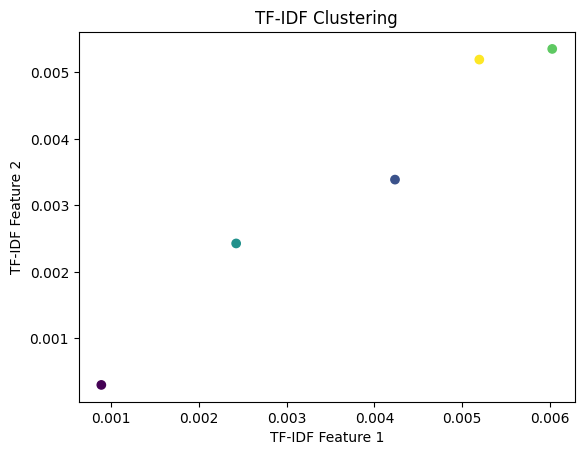

In [23]:
# Adjust the number of clusters
k = min(k, 1)

# Fit the K-means model
kmeans.fit(tfidf_matrix_dense)
cluster_labels = kmeans.labels_

# Visualize clusters
plt.scatter(tfidf_matrix_dense[:, 0], tfidf_matrix_dense[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('TF-IDF Feature 1')
plt.ylabel('TF-IDF Feature 2')
plt.title('TF-IDF Clustering')
plt.show()
